$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1-10)^2 + (x_2+2)^2$. 

$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



 \begin{array}{l}
\ We\ can\ write\ the\ function\ f( x) \ in\ the\ following\ form\\
\\
f( x) \ =\ x^{T} Ax\ +\ 2b^{T} x\ +c\ \\
\\
where\\
\\
x\ =\ \begin{bmatrix}
x_{1}\\
x_{2}
\end{bmatrix} ,\ \ A\ =\ \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} \ ,\ b\ =\ \begin{bmatrix}
-10\\
2
\end{bmatrix} \ ,\ c\ =\ 104
\end{array}


$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

 \begin{array}{l}
Suppose\ that\ we\ are\ at\ iteration\ k\ with\ the\ value\ x_{k} \ and\ we\ define\ our\ descent\ step\\
x_{k+1} =\ x_{k} -\eta \nabla f( x_{k}) \ ,\ \eta  >0\\
If\ we\ substitute\ this\ value\ of\ x_{k+1} \ in\ the\ function\ f( x) \ =\ x^{T} Ax\ +2b^{T} x+c\ ,then\\
we\ get\ a\ second\ order\ degree\ polynomial\ in\ \eta ,\ say\ h( \eta ) .\ We\ can\ then\ find\ the\ \\
minimum\ of\ this\ function\ by\ finding\ the\ solution\ to\ the\ equation\ h'( \eta ) \ =0\ and\ we\ get\\
\\
\eta \ =\ \frac{( \nabla f( x_{k}))^{T} \ \nabla f( x_{k})}{( \nabla f( x_{k}))^{T} \ 2A \ \nabla f( x_{k})}\\
\end{array}


 \begin{array}{l}
Here\ we\ have\ \nabla f( x) \ =\ g( x) \ =\ \begin{bmatrix}
2( x_{1} -10)\\
2( x_{2} +2)
\end{bmatrix}\\
A\ =\ \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}\\
We\ get,\ \ \eta \ =\ \frac{\begin{bmatrix}
2( x_{1} -10)\\
2( x_{2} +2)
\end{bmatrix}^{T}\begin{bmatrix}
2( x_{1} -10)\\
2( x_{2} +2)
\end{bmatrix}}{\begin{bmatrix}
2( x_{1} -10)\\
2( x_{2} +2)
\end{bmatrix}^{T} 2A\begin{bmatrix}
2( x_{1} -10)\\
2( x_{2} +2)
\end{bmatrix}} \ =\ 0.5\\
\\
Hence\ we\ observe\ that\ the\ \eta \ does\ not\ depend\ on\ the\ initial\ value\ of\ the\ x\ and\ hence\ is\ constant.
\end{array}

We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [2]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [64]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]-10)**2 + (x[1]+2)**2


In [65]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]-10),2*(x[1]+2)])

In [66]:
#Complete the module to compute the steplength
def compute_steplength(g_vector, a_matrix):

  assert a_matrix.shape[0] == len(g_vector)
  assert a_matrix.shape[1] == len(g_vector)
  step_length = (np.dot(g_vector.T, g_vector)) / (np.matmul(np.matmul(g_vector.T,2*a_matrix ),g_vector))
 
  return step_length

In [70]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  a_matrix = np.array([
                       [1,0],
                       [0,1]
                       ])
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(g_x,a_matrix) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


# Ex2. Part3

In [71]:
my_start_x = np.array([0,0])
my_tol= 1e-3
find_minimizer(my_start_x, my_tol)

iter: 0  x: [0 0]  f(x): 104  grad at x: [-20   4]  gradient norm: 20.396078054371138
iter: 1  x: [10. -2.]  f(x): 0.0  grad at x: [0. 0.]  gradient norm: 0.0


(array([10., -2.]), 1)

# Part 4 

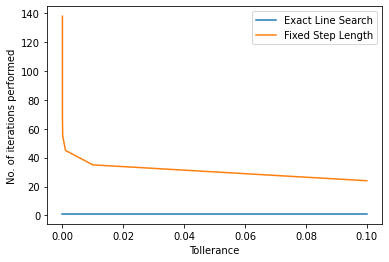

,Tolerance Value,Optimal_x1,Optimal_x2,Optimal_f(x),number_of_iterations
0,1.000000e-01,10.0,-2.0,0.0,1
1,1.000000e-02,10.0,-2.0,0.0,1
2,1.000000e-03,10.0,-2.0,0.0,1
3,1.000000e-04,10.0,-2.0,0.0,1
4,1.000000e-05,10.0,-2.0,0.0,1
5,1.000000e-06,10.0,-2.0,0.0,1
6,1.000000e-07,10.0,-2.0,0.0,1
7,1.000000e-08,10.0,-2.0,0.0,1
8,1.000000e-09,10.0,-2.0,0.0,1
9,1.000000e-10,10.0,-2.0,0.0,1


In [69]:
import matplotlib.pyplot as plt
import pandas as pd


my_start_x = np.array([0,0])
tol_arr = (10**(-np.linspace(1,12,12))).tolist()

opt_x = []
opt_fx = []
iteration = []

for i in tol_arr:
  a,b = find_minimizer(my_start_x,i)
  opt_x.append(a)
  opt_fx.append(evalf(a))
  iteration.append(b)


old_iterations = [24,35,45,55,66,76,86,97,107,117,128,138]

plt.plot(tol_arr,iteration, label ='Exact Line Search')
plt.plot(tol_arr,old_iterations, label='Fixed Step Length')
plt.xlabel('Tollerance')
plt.ylabel('No. of iterations performed')
plt.legend()
plt.show()
print('\n\n')
df = pd.DataFrame(np.array(opt_x), columns = ['Optimal_x1', 'Optimal_x2'])
df['Tolerance Value'] = tol_arr
df['Optimal_f(x)'] = opt_fx
df['number_of_iterations'] = iteration
df[['Tolerance Value', 'Optimal_x1', 'Optimal_x2', 'Optimal_f(x)', 'number_of_iterations']]


***Comment :*** *We observe from the above graph that the number of iterations taken by the algorith when the step length was fixed, is higher than that in the algo where we use line search method. When we update the step length after every iteration, the optimal solution is achieved faster.* 